This experiment covers the Normal AM Modulation and Demodulation in the time and frequency domains.

**Proyecto II, Etapa 2** 

**Filtrado de Senales** 

**Jose Acevedo Hernandez B90036** 

**Grupo 01** 

**Profesor: Marvin Coto Jimenez** 

**Domingo 26 Noviembre 2023**


Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
import matplotlib.image as mpimg # Se agrega esta libreria para incluir imágenes
from matplotlib.table import table # Se agrega esta libreria para incluir tablas

# Introducción: Modulación AM

En esta sección produciremos la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ para representar la señal AM en los dominios de tiempo y la frecuencia, y estudiar el efecto de cambiar cualquiera de los parámetros involucrados.

La señal de mensaje será $m(t)=A_m cos(2 \pi f_mt)$ y la portadora $c(t)=A_c cos(2 \pi f_ct)$. Luego se produce la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en el dominio del tiempo.


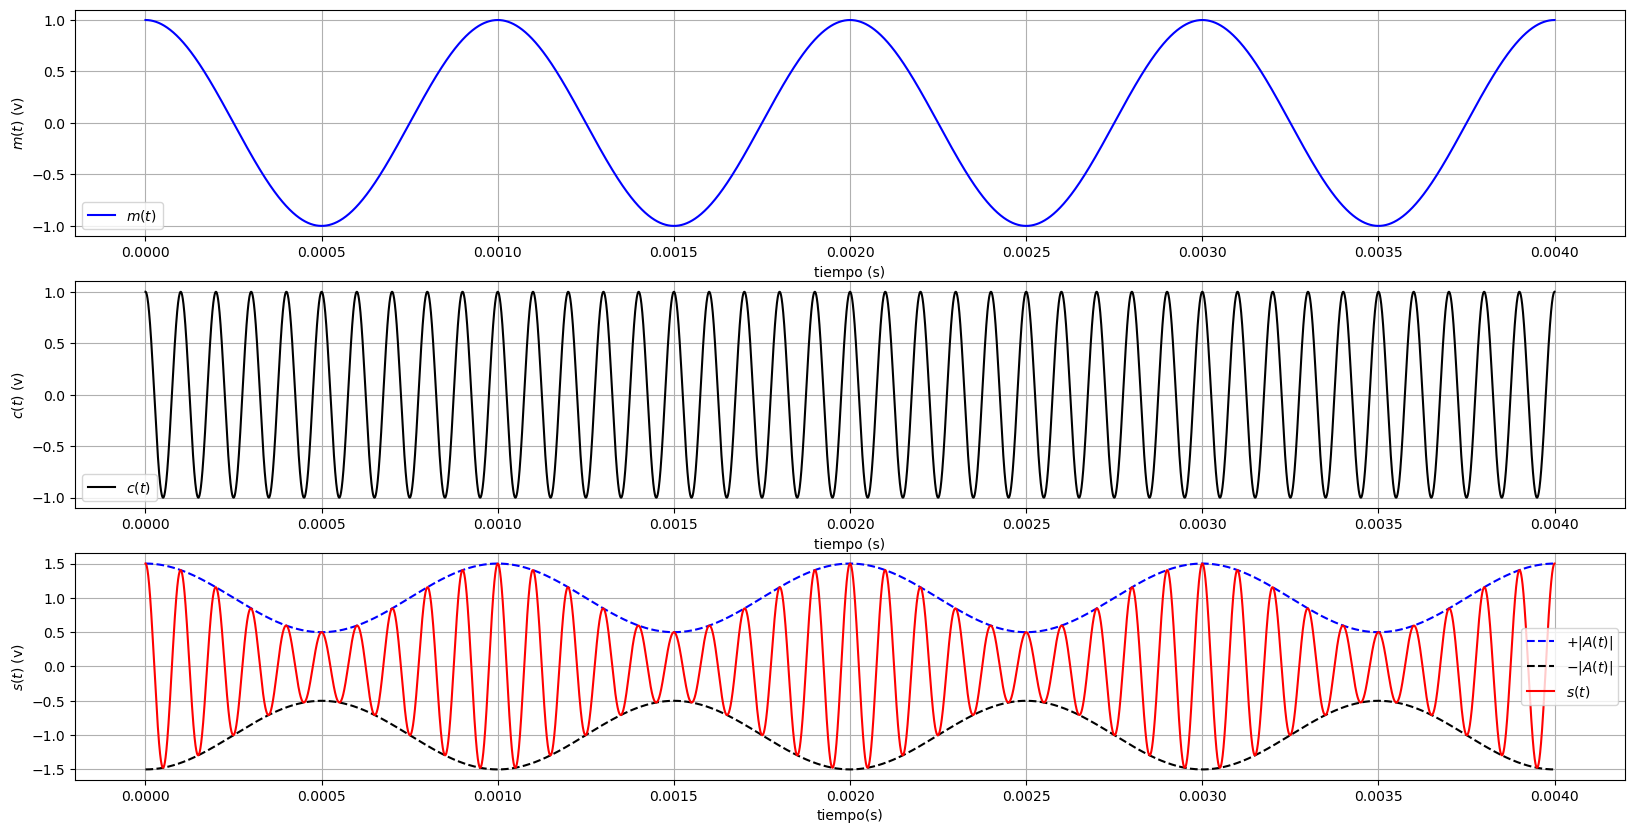

In [2]:
Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud.


## -- No es necesario modificar el código siguiente
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax3 = f.add_subplot(312)
ax5 = f.add_subplot(313)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()
ax1.grid()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()
ax3.grid()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo(s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()
ax5.grid()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)


# Parámetros involucrados en la modulación AM.


Observemos la señal de mensaje $m(t)=A_ccos(2 \pi f_mt)$, la portadora $c(t)=A_ccos(2 \pi f_ct)$, y la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en los dominios del tiempo y de la frecuencia.

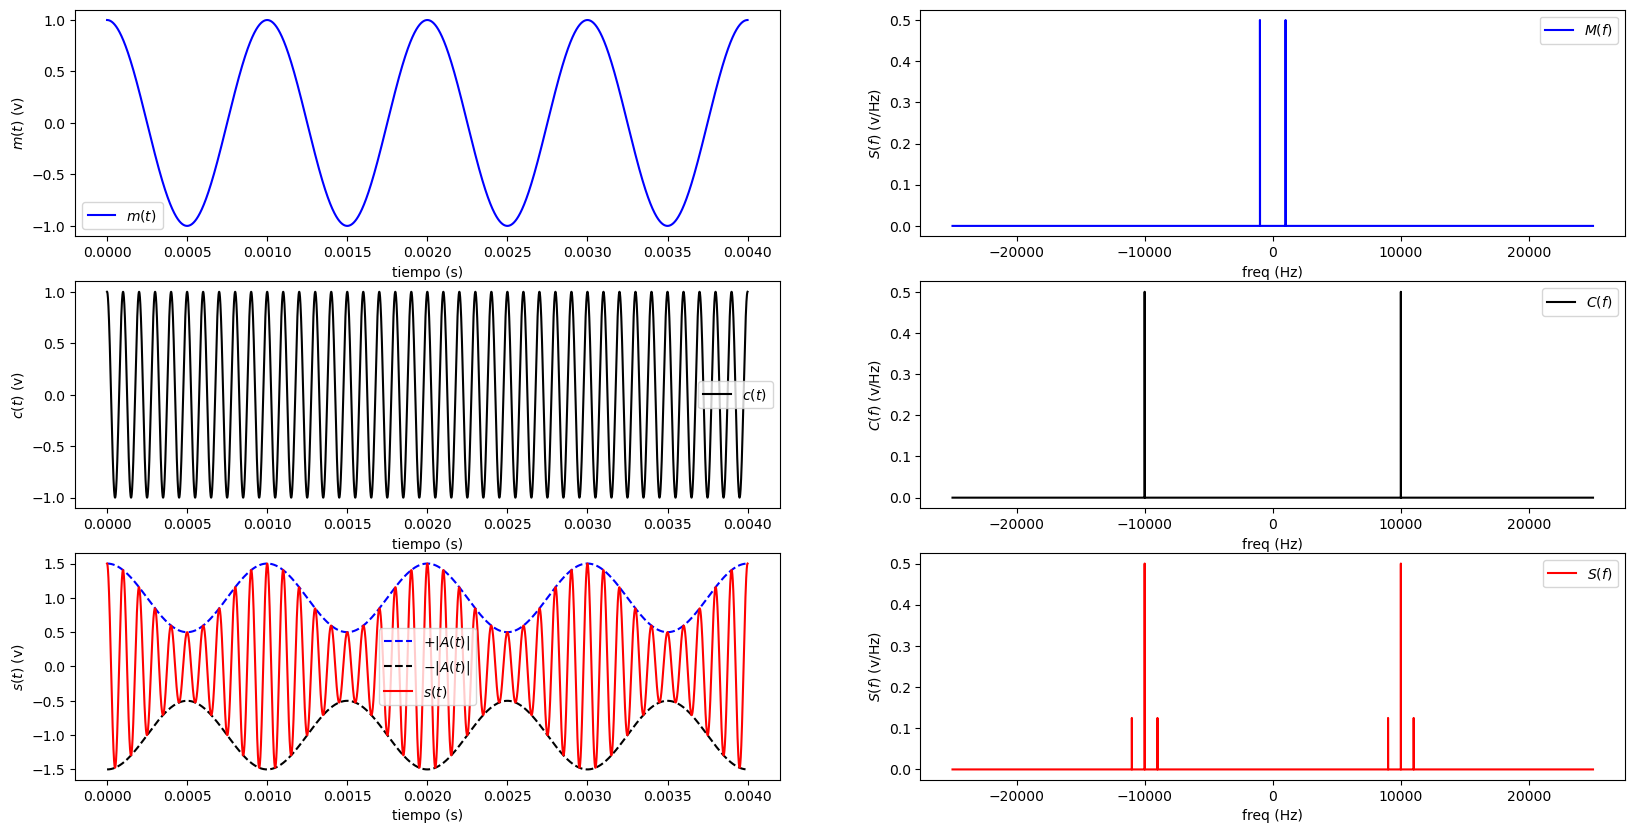

In [3]:
# Se incorpora el siguiente código a una función para reutilizarlo

def modulacion_amplitud(Am, fm, Ac, fc, Ka):
    #Am=1 # Amplitud de la señal mensaje
    #fm=1000 # Frecuencia de la señal mensaje
    #Ac=1 # Amplitud de la portadora
    #fc=10000 # Frecuencia de la portadora
    #Ka=0.5 # Parámetro de sensibilidad de la amplitud


    ## -- No es necesario modificar el código a partir de esta línea
    ## ---- Dominio del tiempo
    Tstart=0
    Tstop=4/fm
    Tstep=0.0001/fm

    t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
    mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
    ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
    st=(1+Ka*mt)*ct # Señal modulada AM
    At=np.abs(Ac*(1+Ka*mt))
    


    f = plt.figure(figsize=(20,10))
    ax1 = f.add_subplot(321)
    ax2 = f.add_subplot(322)
    ax3 = f.add_subplot(323)
    ax4 = f.add_subplot(324)
    ax5 = f.add_subplot(325)
    ax6 = f.add_subplot(326)

    # plot the signals
    ax1.plot(t,mt,'b',label='$m(t)$')
    ax1.set_xlabel('tiempo (s)')
    ax1.set_ylabel('$m(t)$ (v)')
    ax1.legend()

    ax3.plot(t,ct,'k',label='$c(t)$')
    ax3.set_xlabel('tiempo (s)')
    ax3.set_ylabel('$c(t)$ (v)')
    ax3.legend()

    ax5.plot(t,At,'b--',label='$+|A(t)|$')
    ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
    ax5.plot(t,st,'r',label='$s(t)$')
    ax5.set_xlabel('tiempo (s)')
    ax5.set_ylabel('$s(t)$ (v)')
    ax5.legend()

    ## ---- Dominio de la frecuencia
    Tstart=0
    Tstop=10000/fc
    Tstep=0.2/fc

    t=np.arange(Tstart,Tstop,Tstep) # Tiempo
    N=len(t)
    mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
    ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
    st=(1+Ka*mt)*ct # Señal modulada AM
    At=Ac*(1+Ka*mt)

    Mf = np.abs(np.fft.fft(mt))
    freqs = np.fft.fftfreq(mt.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Mf=Mf[idx]/N
    ax2.plot(freqs, Mf,'b',label='$M(f)$')
    ax2.set_xlabel('freq (Hz)')
    ax2.set_ylabel('$S(f)$ (v/Hz)')
    ax2.legend()

    Cf = np.abs(np.fft.fft(ct))
    freqs = np.fft.fftfreq(ct.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Cf=Cf[idx]/N
    ax4.plot(freqs, Cf,'k',label='$C(f)$')
    ax4.set_xlabel('freq (Hz)')
    ax4.set_ylabel('$C(f)$ (v/Hz)')
    ax4.legend()

    Sf = np.abs(np.fft.fft(st))
    freqs = np.fft.fftfreq(st.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Sf=Sf[idx]/N
    ax6.plot(freqs, Sf,'r',label='$S(f)$')
    ax6.set_xlabel('freq (Hz)')
    ax6.set_ylabel('$S(f)$ (v/Hz)')
    ax6.legend()

Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud

modulacion_amplitud(Am, fm, Ac, fc, Ka)


#Se modifica el codigo anterior para graficar solamamente los espectros



def modulacion_amplitud_espectros(Am, fm, Ac, fc, Ka):
    ## ---- Dominio de la frecuencia
    Tstart = 0
    Tstop = 10000 / fc
    Tstep = 0.2 / fc

    t = np.arange(Tstart, Tstop, Tstep)  # Tiempo
    N = len(t)
    mt = Am * np.cos(2 * math.pi * fm * t)  # Señal mensaje
    ct = Ac * np.cos(2 * math.pi * fc * t)  # Señal portadora
    st = (1 + Ka * mt) * ct  # Señal modulada AM
    At = Ac * (1 + Ka * mt)

    f = plt.figure(figsize=(20, 10))
    ax2 = f.add_subplot(221)
    ax4 = f.add_subplot(222)
    ax6 = f.add_subplot(223)

    Mf = np.abs(np.fft.fft(mt))
    freqs = np.fft.fftfreq(mt.size, Tstep)
    idx = np.argsort(freqs)
    freqs = freqs[idx]
    Mf = Mf[idx] / N
    ax2.plot(freqs, Mf, 'b', label='$M(f)$')
    ax2.set_xlabel('freq (Hz)')
    ax2.set_ylabel('$S(f)$ (v/Hz)')
    ax2.legend()

    Cf = np.abs(np.fft.fft(ct))
    freqs = np.fft.fftfreq(ct.size, Tstep)
    idx = np.argsort(freqs)
    freqs = freqs[idx]
    Cf = Cf[idx] / N
    ax4.plot(freqs, Cf, 'k', label='$C(f)$')
    ax4.set_xlabel('freq (Hz)')
    ax4.set_ylabel('$C(f)$ (v/Hz)')
    ax4.legend()

    Sf = np.abs(np.fft.fft(st))
    freqs = np.fft.fftfreq(st.size, Tstep)
    idx = np.argsort(freqs)
    freqs = freqs[idx]
    Sf = Sf[idx] / N
    ax6.plot(freqs, Sf, 'r', label='$S(f)$')
    ax6.set_xlabel('freq (Hz)')
    ax6.set_ylabel('$S(f)$ (v/Hz)')
    ax6.legend()

    plt.show()

Am = 1  # Amplitud de la señal mensaje
fm = 1000  # Frecuencia de la señal mensaje
Ac = 1  # Amplitud de la portadora
fc = 10000  # Frecuencia de la portadora
Ka = 0.5  # Parámetro de sensibilidad de la amplitud

#modulacion_amplitud_espectros(Am, fm, Ac, fc, Ka)







**Ver: Ejercicios indicados en el planteamiento del proyecto**

A continuación se comentará que efectos se tiene en las señal al modificar los valores de los siguientes parámetros:

(a) fm

(b) fc

(c) Am

(d) Ac

(e) Ka


## (a) Fm

La frecuencia de la señal moduladora generalmente es muchísimo menor respecto a la frecuencia de la señal portadora, ya que la información que se quiere transmitir suele ser de baja frecuencia, por ejemplo la voz humana. Entonces, según Micolau & Ruiz en el caso concreto de la AM comercial, se trata por lo general de señal de voz o musical de baja calidad
cuyo ancho de banda se sitúa sobre los 3,5 kHz o 4 kHz.Por lo que no tiene mucho sentido cambiar el valor de fm máas allá de esos valores. Aunque por temas practicas se realizará.

#### Para fm=1kHz 

Frecuencia de la señal mensaje fm =  1000 Hz


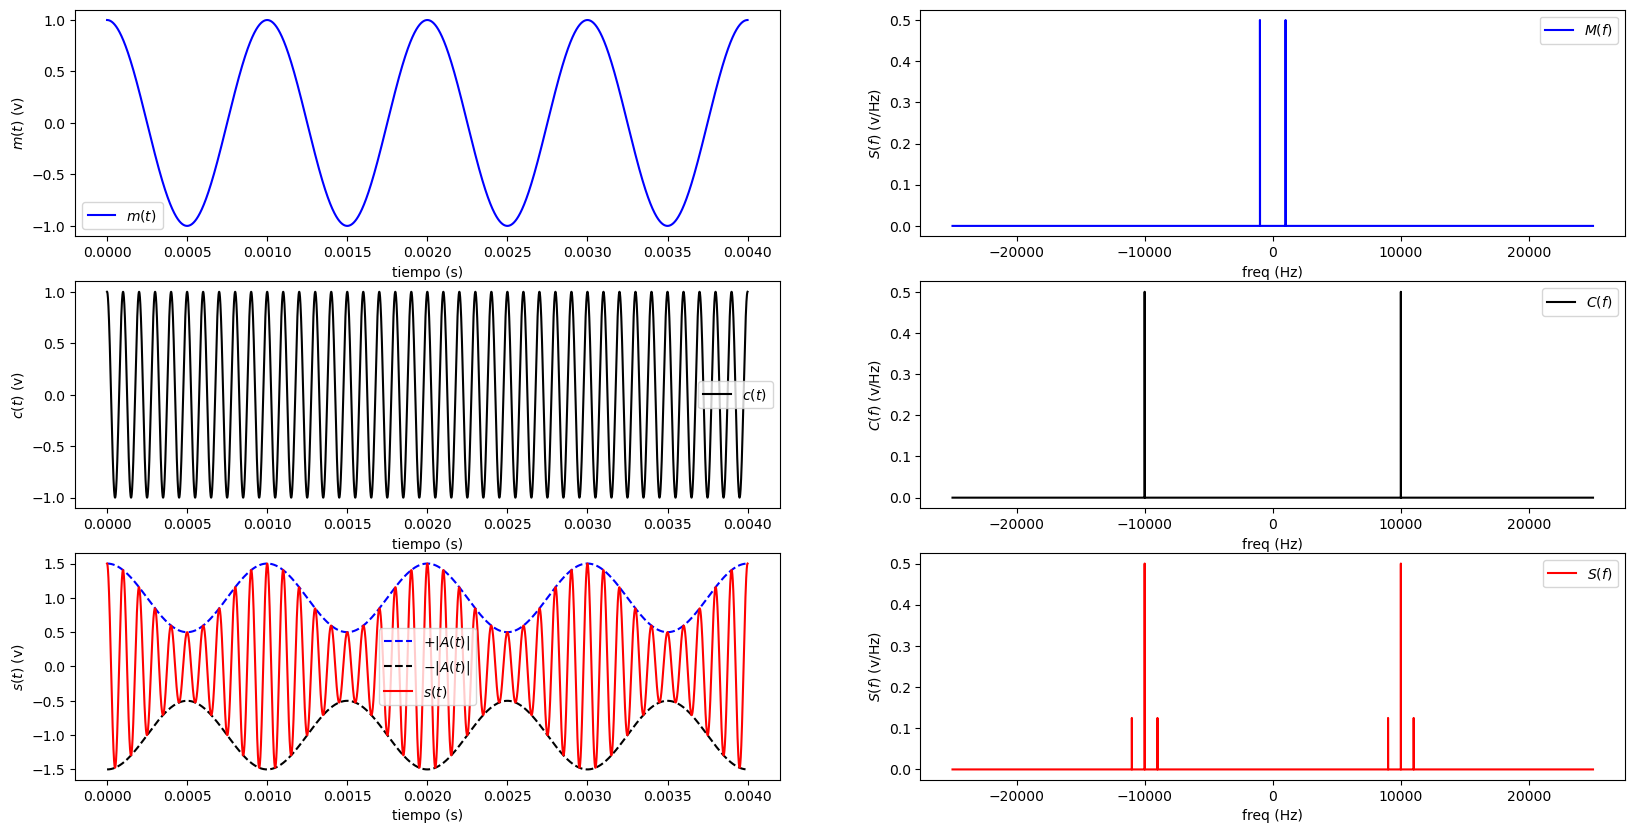

In [4]:
Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
fm1=4000 # Variación en la frecuencia de la señal mensaje
fm2=10000 # Variación en la frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud

print ("Frecuencia de la señal mensaje fm = ", fm, "Hz")
modulacion_amplitud(Am, fm, Ac, fc, Ka)


#### Para fm1=4kHz

Frecuencia de la señal mensaje fm =  4000 Hz


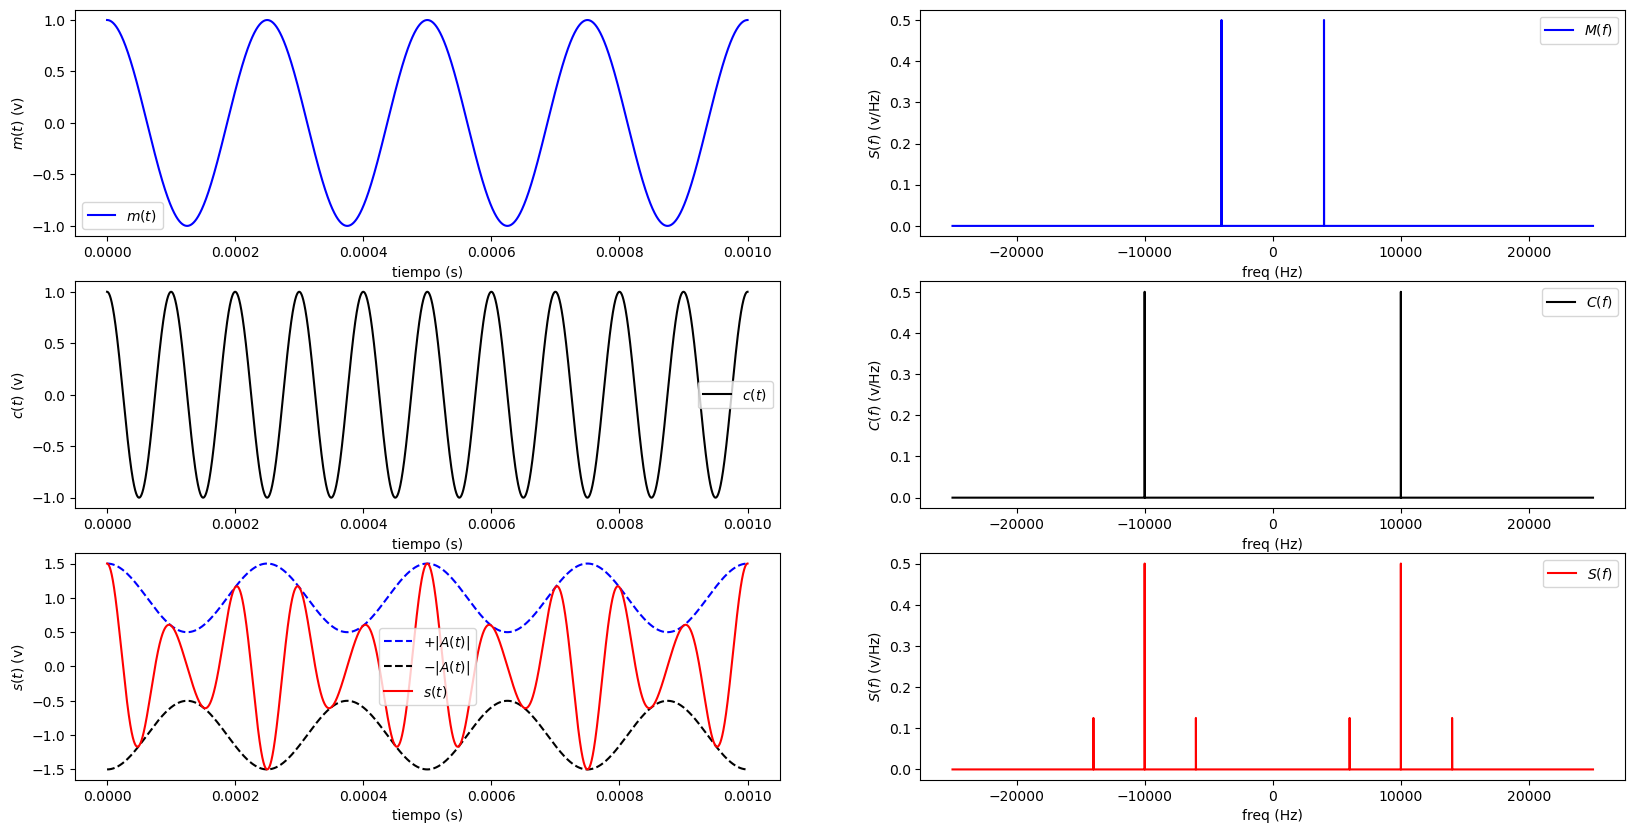

In [5]:
print ("Frecuencia de la señal mensaje fm = ", fm1,"Hz")
modulacion_amplitud(Am, fm1, Ac, fc, Ka)

#### Para fm2=10kHz

Frecuencia de la señal mensaje fm =  10000 Hz


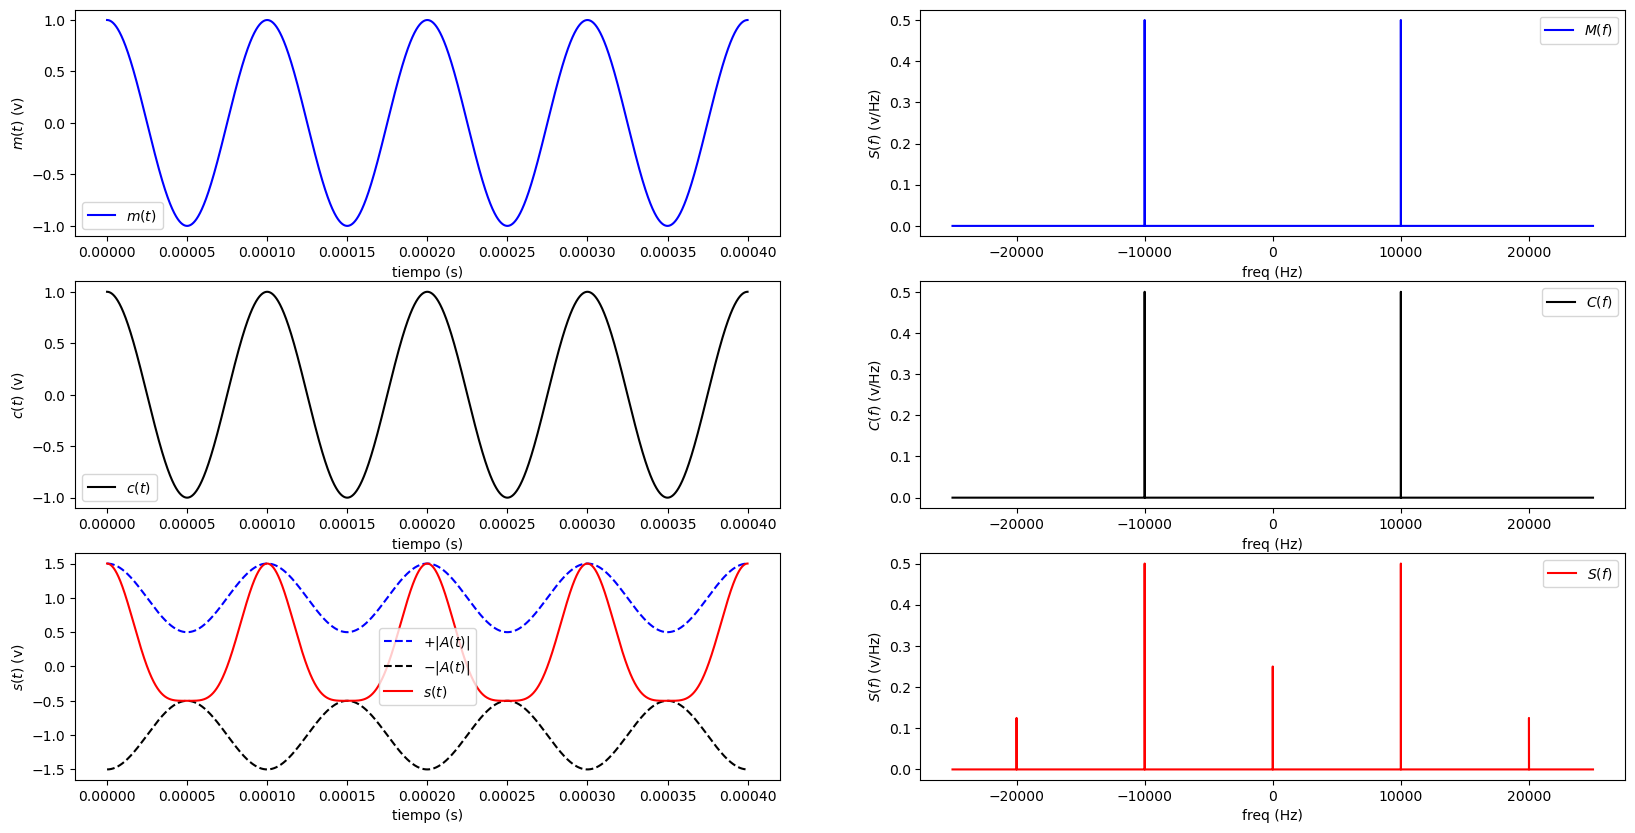

In [6]:
print ("Frecuencia de la señal mensaje fm = ", fm2, "Hz")
modulacion_amplitud(Am, fm2, Ac, fc, Ka)

Considerando la funcionalidad de la modulacion AM y suponiendo la frecuencia de la señal modulado ideal en fm= 4kHz.Entonces para **fm= 1kHz** el cambio mas significativo se ve reflejado en el ancho de banda, ya que al disminuir la frecuencia su ancho de banda tambien disminuye respecto a la referencia de **fm1=4kHz**. Para **fm2= 100kHz**, tanto el espectro como la señal en el tiempo se ven afectadas. Observese que en el dominio de la frecuencias las bandas laterales son las que cambian drasticamente, a tal punto que debido al desplazamiento se superponen . En el dominio temporal se aprecia como la señal portadora se corta.

## (b) Fc

La frecuencia de la señal portadora la banda que se va a utilizar del espectro de frecuencia. Es decir dado un ancho de banda disponible de un espectro, el valor de Fc indica el lugra que va ocupar la señal a transmitir. Por ejemplo, supongo que quiere transmitir el mensaje dado por 3 radioemosoras AM (R1,R2,R3). Entonces para evitar traslape en los mensajes se debe asignar una frecuencia a cada emisora para colocarlas en un punto especifico del ancho de banda disponible. Asi supongo que a R1 le corresponde f1, a R2 se le asigna f2 y a R3 se ajusta a f3. Para evitar saturar el documento solo se graficará el espectro de frecuencias para dos valores distintos de fc y se omitirá el comportamiento temporal de las señales ya que es de esperar que no haya cambios significativos siempre y cuando el valor de fc sea mucho mayor a fm.

#### Para fc1=20kHz

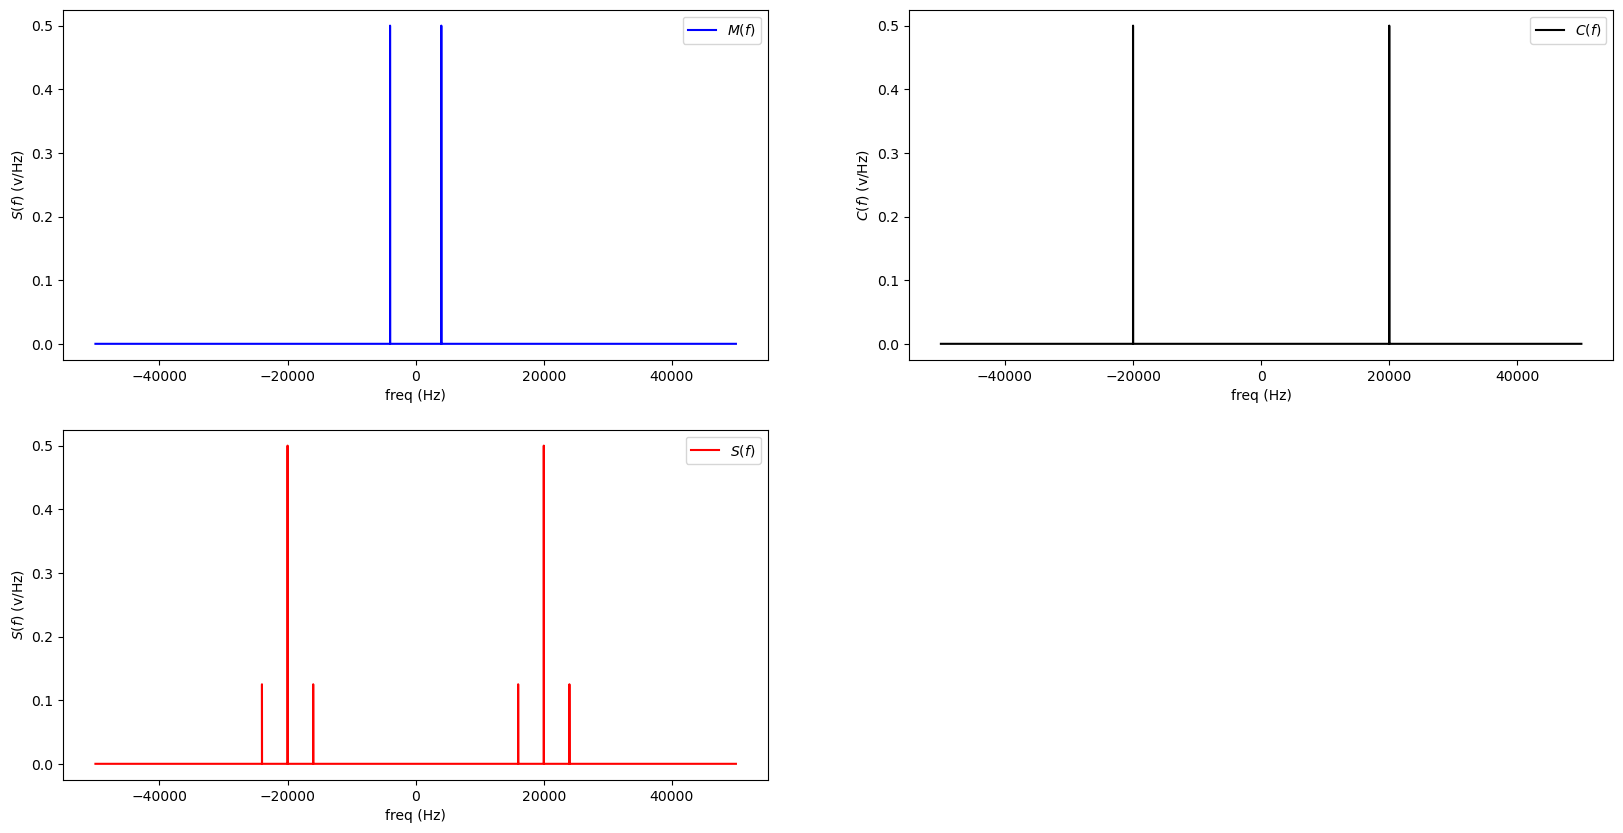

In [7]:
fc1 = 20000
fm = 4000
modulacion_amplitud_espectros(Am, fm, Ac, fc1, Ka)

#### Para fc2=40kHz

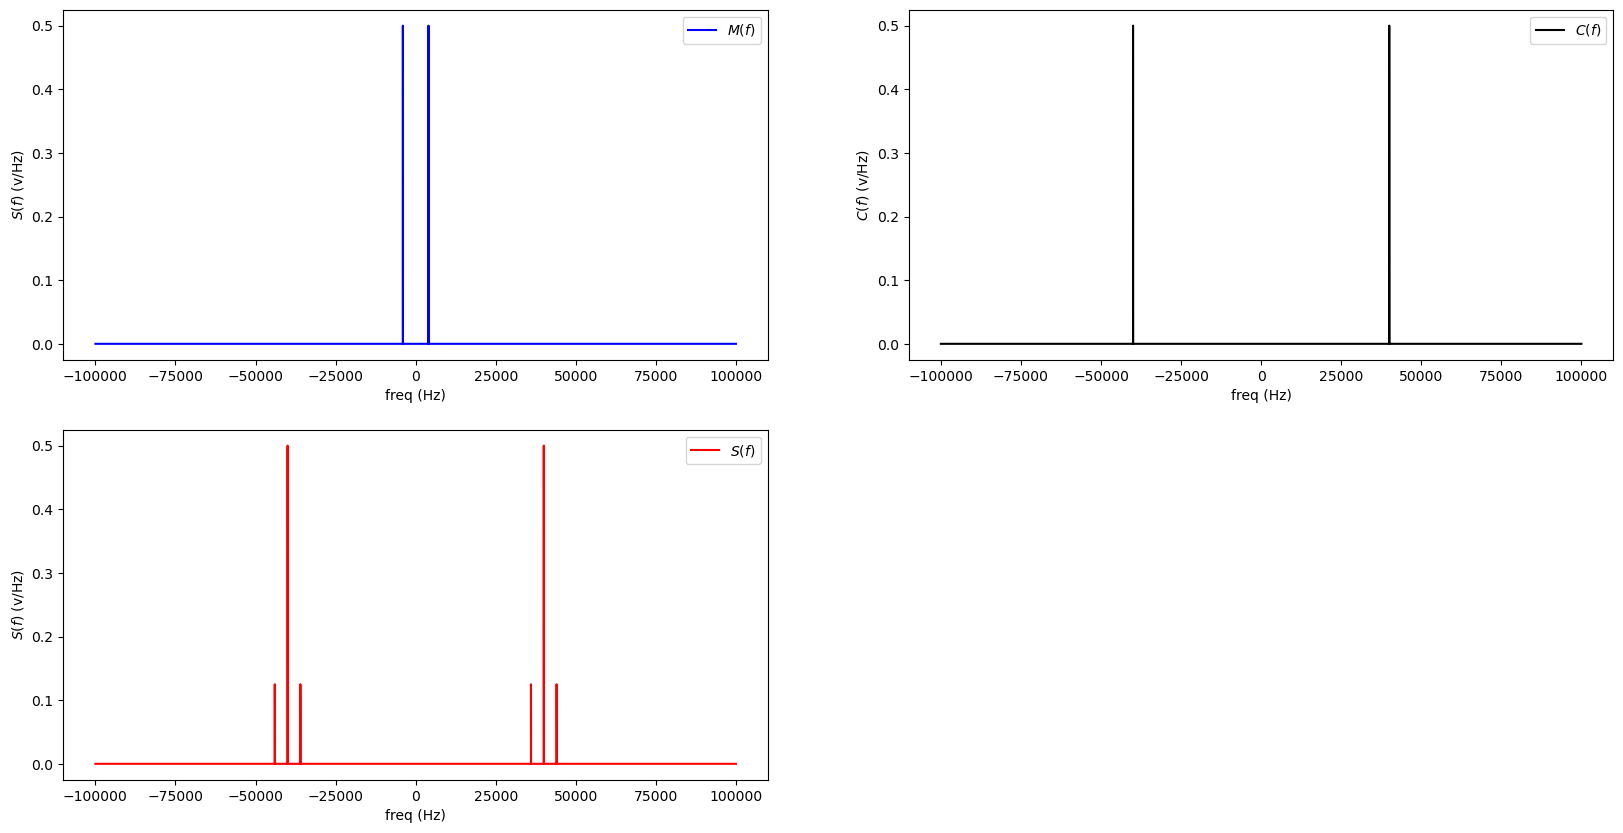

In [8]:
fc2= 40000
modulacion_amplitud_espectros(Am, fm, Ac, fc2, Ka)

Es claro el desplazamiento de los espectros tanto para la señal portadora como para la modulada, la señal moduladora no sufre cambios ya que esta es independiente del parámetro fc. Así, mediante el valor de fc se puede escoger la banda donde se quiere que se transmita la información.

## (c,d,e) Am , Ac, $K_a$

Se considerará simultáneamente los tres parámetros ya que todos están relacionados entre sí. Dado que $K_a$  es sensible al cambio de amplitud, es decir; según cambie $k_a$, los cambios tanto de Am como de Ac serán de mayor o menor importancia.

De lo anterior, si se mantiene constante Ac, $k_a$ y se aumenta el valor de Am tal que Am > Ac,lo que produce el fenómeno de sobremodulación que a nivel gráfico la señal moduladora corta el eje x. En este punto, se puede perder información, además de la distorsión de los armónicos. Ahora en términos de los espectros,la magnitud del impulso tanto para m(t) como para s(t) aumentan. En este caso, si el valor de $k_a$ < 1,es decir; sensible a la amplitud, el fenómeno de sobremodulación se atenúa en un factor. Sin embargo a mayor el valor de $k_a$, la sobremodulación es cada vez mayor. Observe los siguientes gráficos:

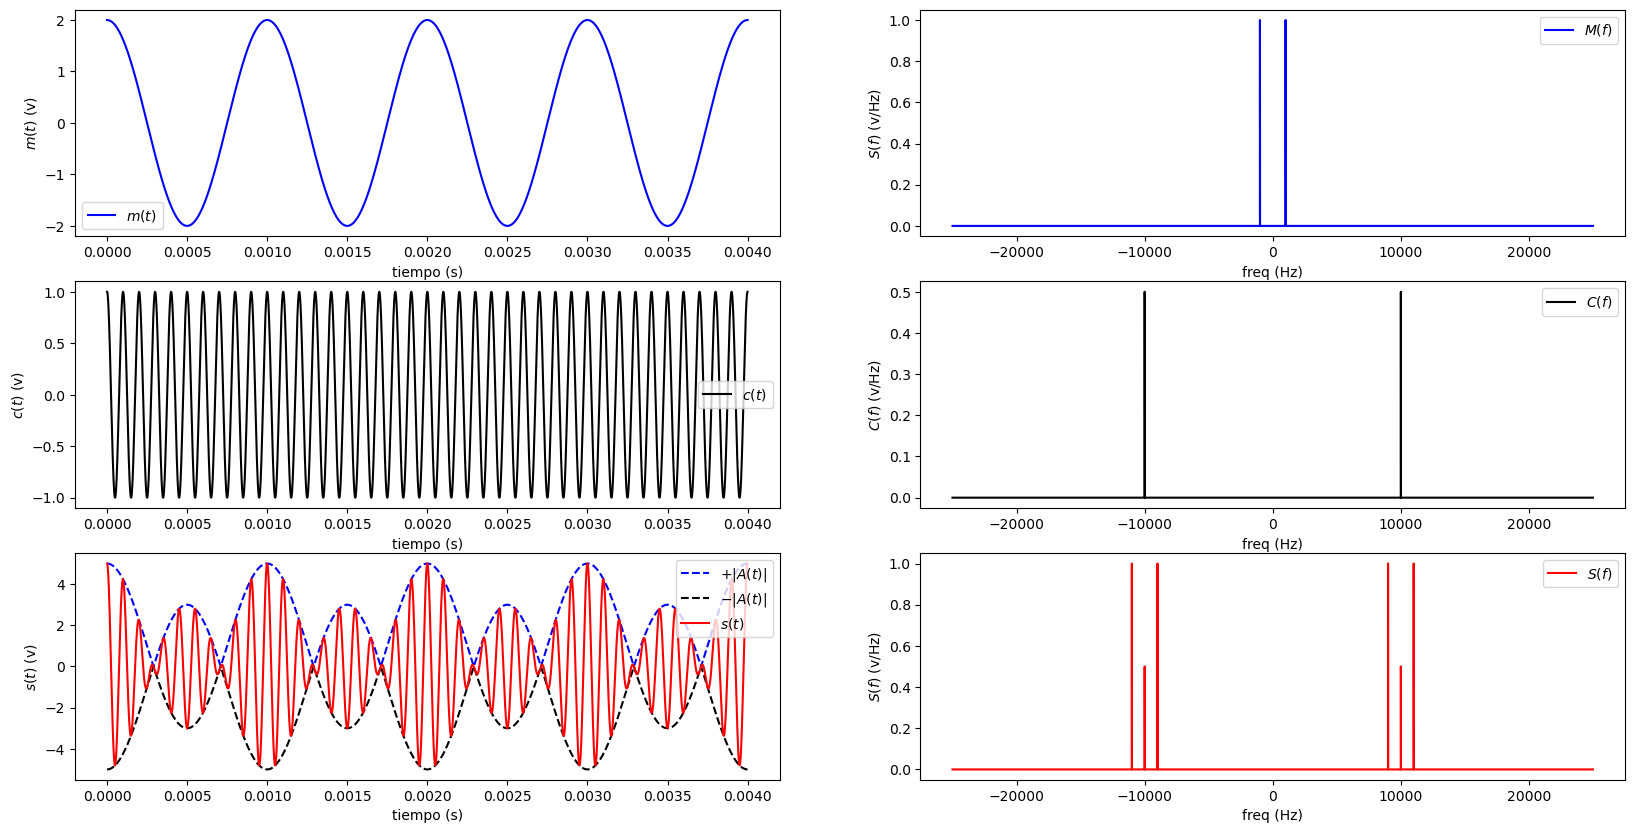

In [9]:
Am=2 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=2 # Parámetro de sensibilidad de la amplitud

modulacion_amplitud(Am, fm, Ac, fc, Ka)

Por otra parte, si Am<<Ac se produce el fenomeno de submodulación, que corresonde a frecuencias muy bajas lo que conlleva a que gran parte de la senal portadora no se module. Esto implica que la información contenida en la senal moduladora sea débil lo que la convierte a la senal modulada difícil de desmodular. Otro aspecto a considerar, es que el ancho de banda de la senal modulada puede ser lo sufientemente pequeno que sea complicado detectarla en el espectro de frecuencias.En este punto, el factor $k_a$ juega un papel importante, puesto que si $k_a$ se acerca al valor de $Am/Ac$, el fenomeno de submodulación es cad vez mas significativo. En caso contrario, para valores alejados $k_a$ se puede llegar a presentar el fenómeno de sobremodulación. Observe los siguientes gráficos:

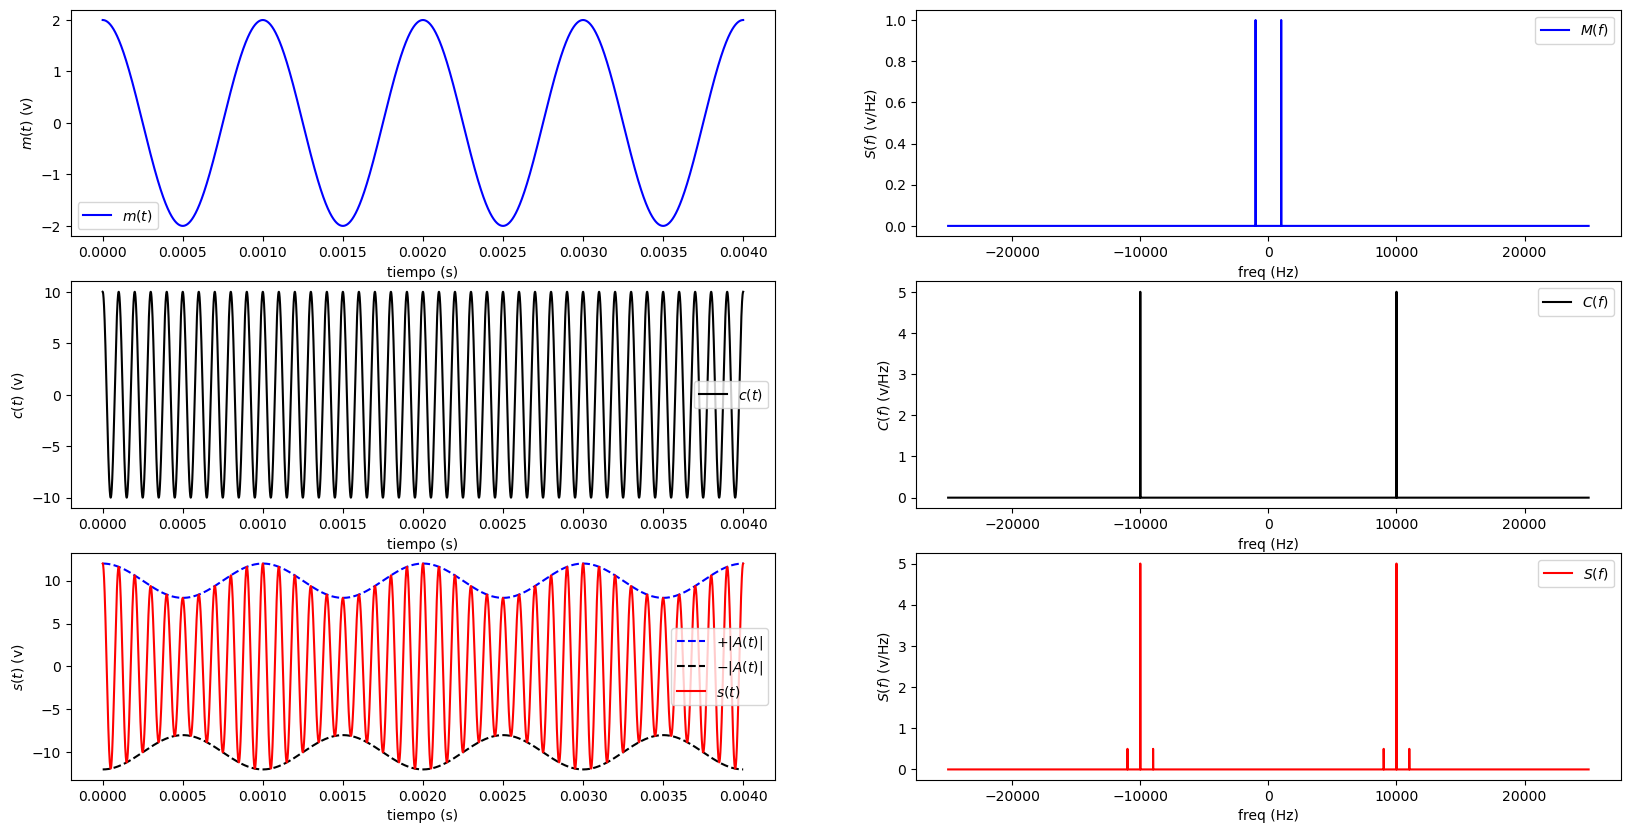

In [10]:
óAm=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=10 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.1 # Parámetro de sensibilidad de la amplitud

modulacion_amplitud(Am, fm, Ac, fc, Ka)

# Efecto de cambiar el índice de modulación $\mu$

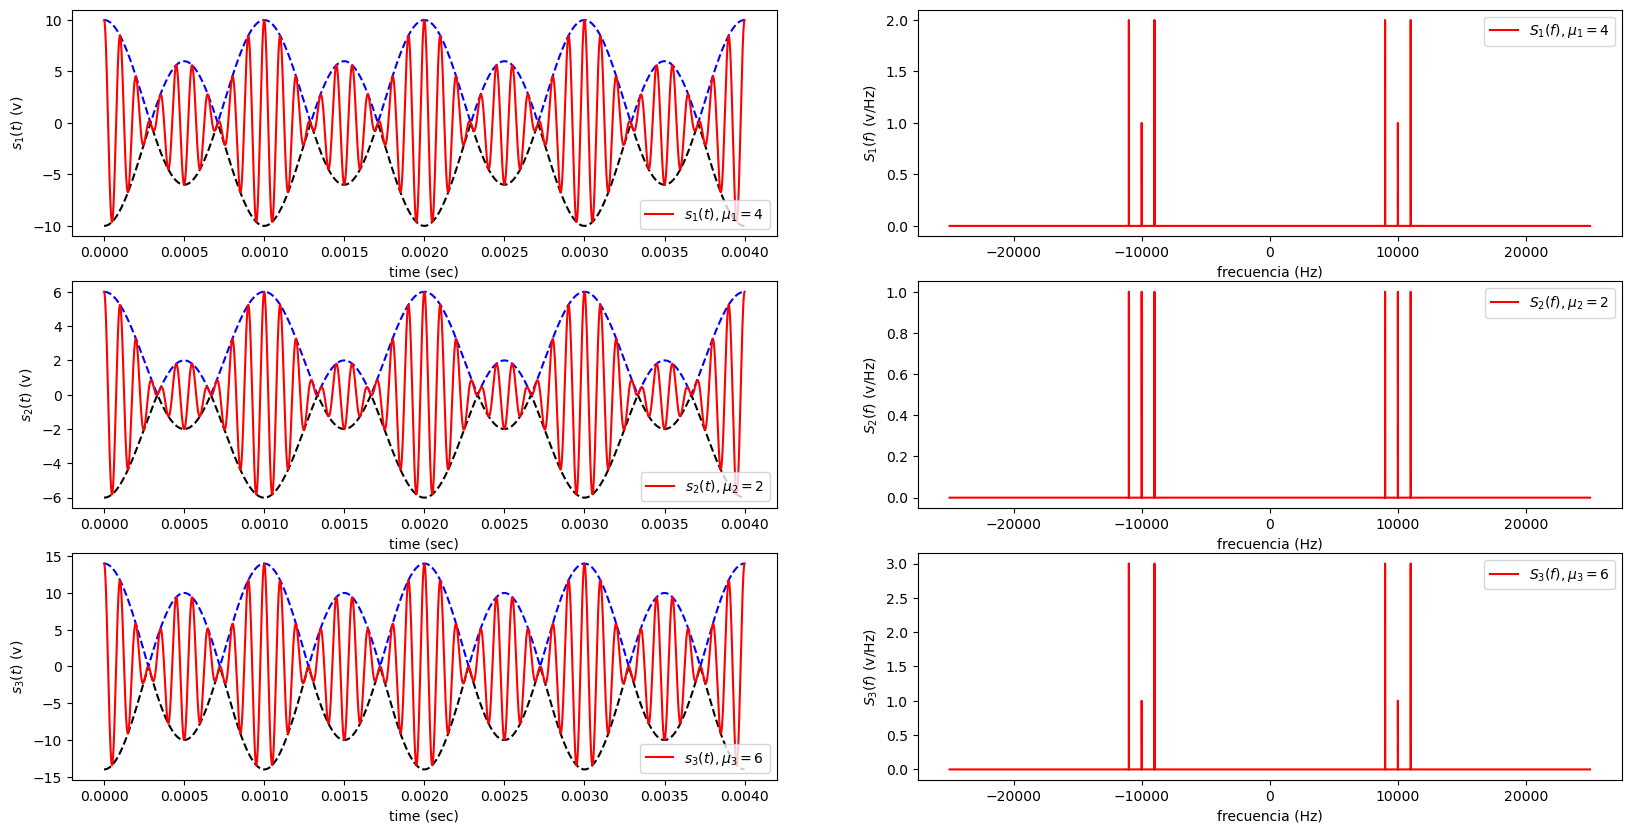

In [11]:
#Se modifica el código para incluirlo dentro de una función para reutilizarlo en líneas siguientes
def indice_modulacion(Am1,Am2,Am3,fm,Ac,fc,ka):
    #Am1=0.5  # Amplitud de la señal de mensaje 1
    #Am2=1 # Amplitud de la señal de mensaje 2
    #Am3=3 # Amplitud de la señal de mensaje 3
    #fm=1000 # Frecuencia de las señales mensaje

    #Ac=2 # Amplitud de la señal portadora
    #fc=10000 # Frecuencia de la señal portadora
    #Ka=2 # Parámetro de sensibilidad de amplitud

    ## -- No es necesario modificar el código después de esta línea
    ## ---- Dominio del tiempo
    Tstart=0
    Tstop=4/fm
    Tstep=0.0001/fm

    t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
    mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
    mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
    mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
    ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
    st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
    st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
    st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
    At1=np.abs(Ac*(1+Ka*mt1))
    At2=np.abs(Ac*(1+Ka*mt2))
    At3=np.abs(Ac*(1+Ka*mt3))

    mu1=Am1*Ka
    mu2=Am2*Ka
    mu3=Am3*Ka

    f = plt.figure(figsize=(20,10))
    ax1 = f.add_subplot(321)
    ax2 = f.add_subplot(322)
    ax3 = f.add_subplot(323)
    ax4 = f.add_subplot(324)
    ax5 = f.add_subplot(325)
    ax6 = f.add_subplot(326)

    # Gráficas de las señales
    ax1.plot(t,At1,'b--',)
    ax1.plot(t,-1*At1,'k--')
    ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
    ax1.set_xlabel('time (sec)')
    ax1.set_ylabel('$s_1(t)$ (v)')
    ax1.legend()

    ax3.plot(t,At2,'b--')
    ax3.plot(t,-1*At2,'k--')
    ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
    ax3.set_xlabel('time (sec)')
    ax3.set_ylabel('$s_2(t)$ (v)')
    ax3.legend()

    ax5.plot(t,At3,'b--')
    ax5.plot(t,-1*At3,'k--')
    ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
    ax5.set_xlabel('time (sec)')
    ax5.set_ylabel('$s_3(t)$ (v)')
    ax5.legend()
    ## ---- Dominio de la frecuencia
    Tstart=0
    Tstop=10000/fc
    Tstep=0.2/fc
    t=np.arange(Tstart,Tstop,Tstep) # Tiempo
    mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
    mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
    mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
    ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
    st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
    st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
    st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
    At1=np.abs(Ac*(1+Ka*mt1))
    At2=np.abs(Ac*(1+Ka*mt2))
    At3=np.abs(Ac*(1+Ka*mt3))

    Sf1 = np.abs(np.fft.fft(st1))
    freqs = np.fft.fftfreq(st1.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Sf1=Sf1[idx]/N
    ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
    ax2.set_xlabel('frecuencia (Hz)')
    ax2.set_ylabel('$S_1(f)$ (v/Hz)')
    ax2.legend()

    Sf2 = np.abs(np.fft.fft(st2))
    freqs = np.fft.fftfreq(st2.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Sf2=Sf2[idx]/N
    ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
    ax4.set_xlabel('frecuencia (Hz)')
    ax4.set_ylabel('$S_2(f)$ (v/Hz)')
    ax4.legend()

    Sf3 = np.abs(np.fft.fft(st3))
    freqs = np.fft.fftfreq(st3.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Sf3=Sf3[idx]/N
    ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
    ax6.set_xlabel('frecuencia (Hz)')
    ax6.set_ylabel('$S_3(f)$ (v/Hz)')
    ax6.legend()
    
Am1=2  # Amplitud de la señal de mensaje 1
Am2=1 # Amplitud de la señal de mensaje 2
Am3=3 # Amplitud de la señal de mensaje 3
fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora
fc=10000 # Frecuencia de la señal portadora
Ka=2 # Parámetro de sensibilidad de amplitud

indice_modulacion(Am1,Am2,Am3,fm,Ac,fc,Ka)

**Ver Ejercicios en el planteamiento del proyecto**

Realice modificaciones en los valores de los siguientes parámetros y comente para cada uno los efectos que tienen en las
senales y sus espectros:

(a) Am1, Am2, Am3.

(b) Ka.

En primer lugar, antes de realizar las variaciones de los párametros solicitados, al leer el código, en el mismo se define $\mu_i=Am_i \cdot Ka$. Este valor de $\mu$ define el índice de modulación, que a grosso modo indica que tanto incide la senal moduladora en la senal portadora. Así mientras mayor sea el valor de  $\mu$ mas influencia tendrá $m(t)$ sobre $c(t)$.

Dado que  $\mu$ corresponde a un índice, su valor esta definido entre $0$ y $1$. Así, para $\mu = 0$, se tiene el caso máximo teórico de nula modulación, lo que implica que la onda moduladora prácticamente no esta influyendo sobre la onda portadora. En el otro caso extremo, $\mu = 1$, la onda moduladora está incidiendo en su totalidad sobre la portadora, lo cual a nivel práctico no es recomendable por que se puede perder información ya que está en el punto límite de que ocurra el fenómeno de sobremodulación.A continuación se presenta los casos extremos (considere que para $\mu$ lejos de los extremos se puede obtiene un comportamiento similar a las gráficas anteriores, basta con escoger $Am_i$ y $k_a$ tal que $\mu$ no sea 0 ni 1).

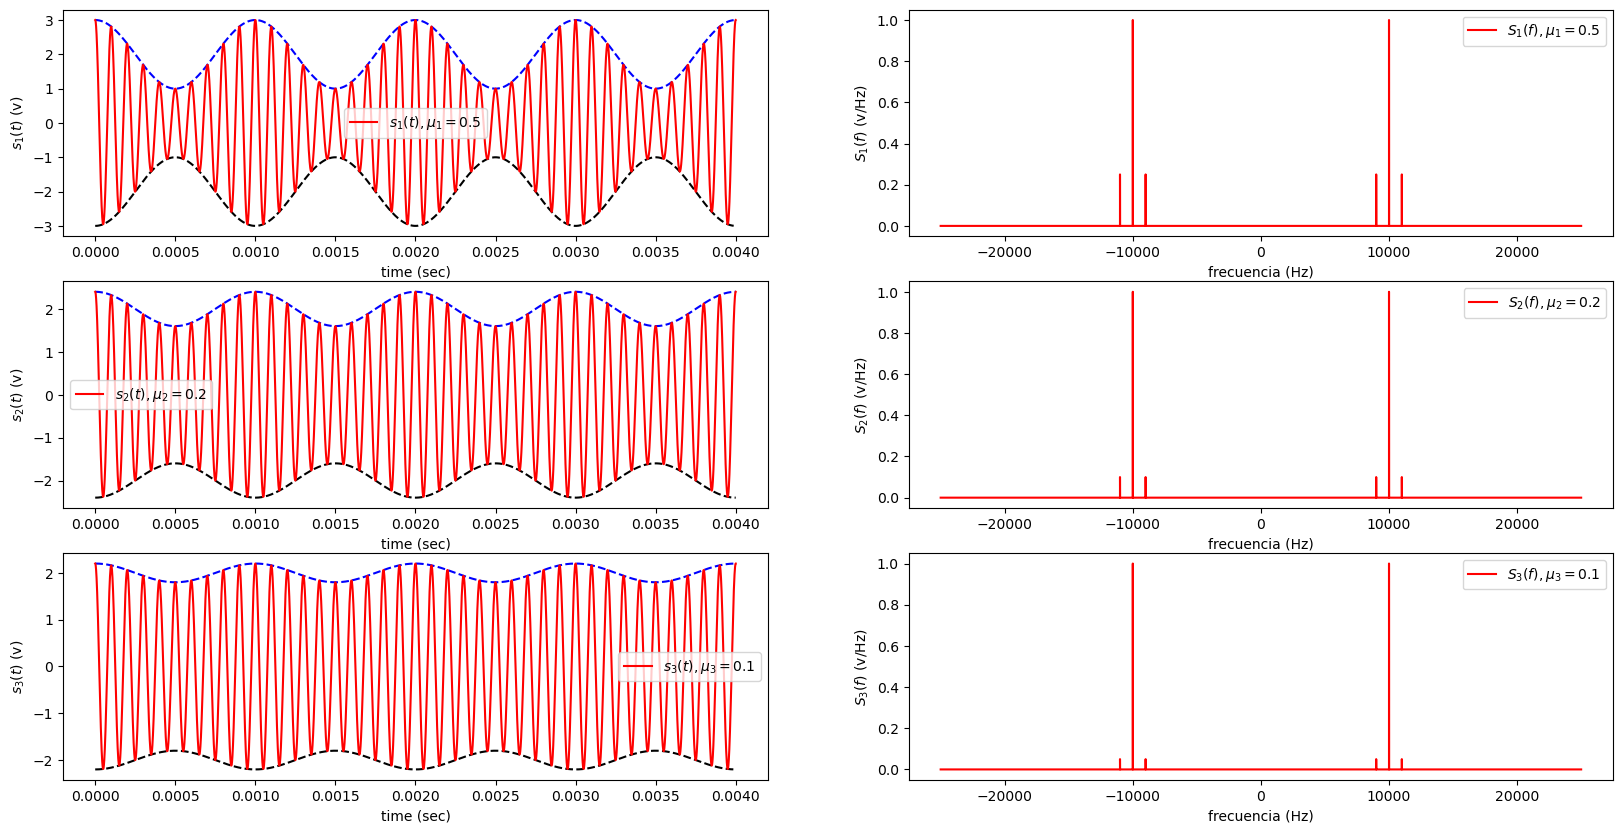

In [12]:
Am1=0.25  # Amplitud de la señal de mensaje 1
Am2=0.10 # Amplitud de la señal de mensaje 2
Am3=0.05 # Amplitud de la señal de mensaje 3
fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora
fc=10000 # Frecuencia de la señal portadora
Ka=2 # Parámetro de sensibilidad de amplitud

indice_modulacion(Am1,Am2,Am3,fm,Ac,fc,Ka)

Respecto a los espectro, cuanto se modifica los valores de Am, la magnitud del pulso tambien cambia proporcionalmente.

# Modulación AM de señales con múltiples componentes armónicos

Se aplicará modulación AM para la señal $X(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

Función en Python para generar $m(t)$:

In [13]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # Componente 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # Componente 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # Componente 3
   mt=m1t+m2t+m3t # Señal combinada
   return mt

Función en Python para generar la portadora $c(t)$

In [14]:
def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
   return ct

Función en Python para generar la modulación AM $s(t)$.

In [15]:
def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # Modulación AM
   return st

Producción y graficación de las señales en el tiempo y la frecuencia:

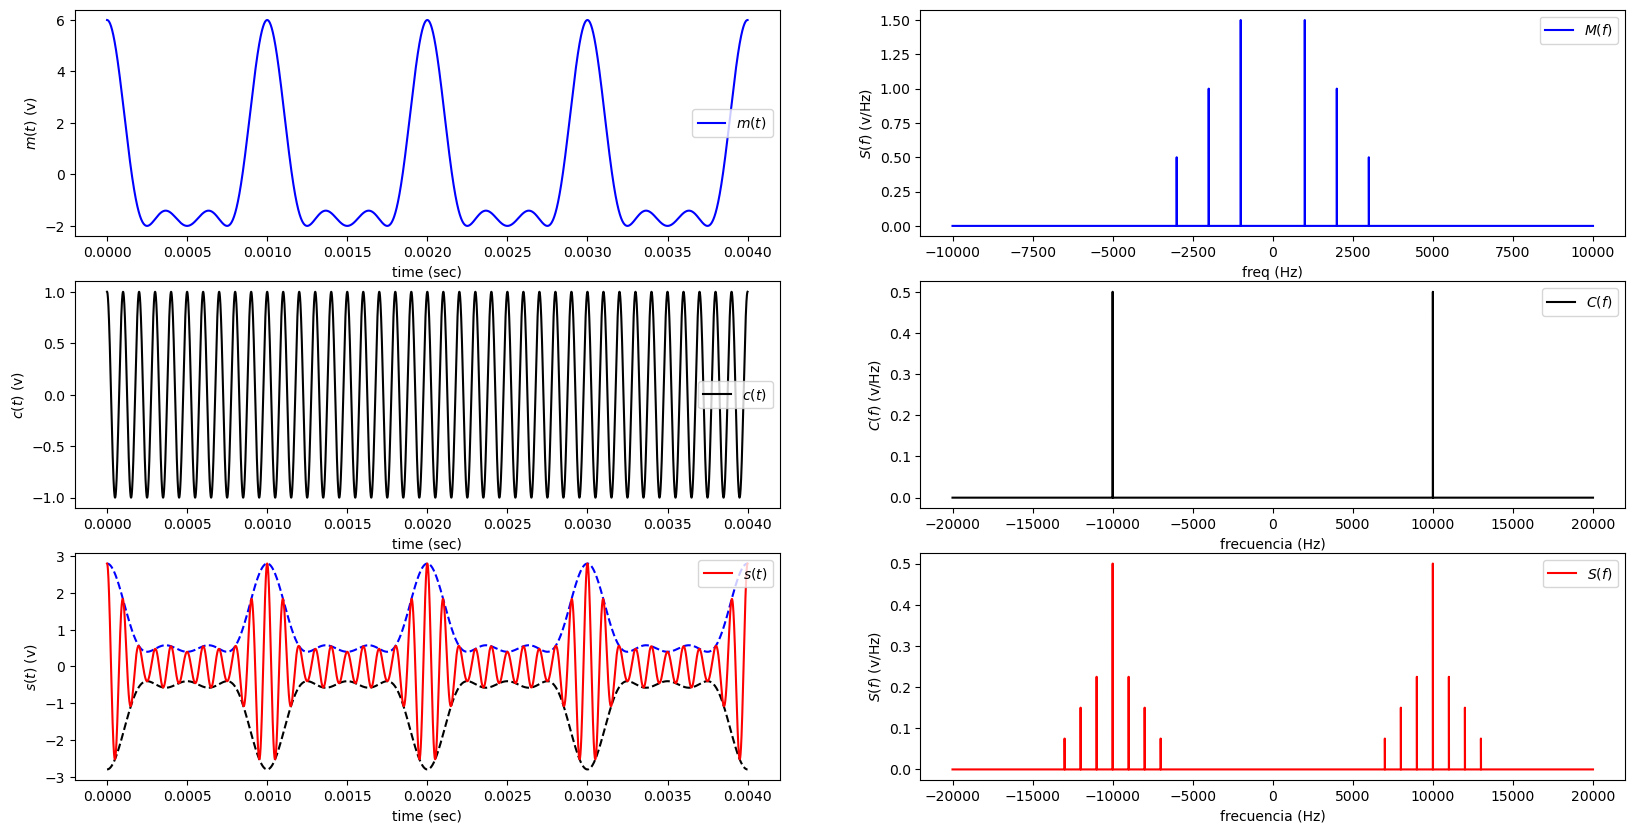

In [18]:
#Se modifica el código para incluirlo dentro de una función para reutilizarlo en líneas siguientes

def modulacion_multiple(Am1,fm1,Am2,fm2,Am3,fm3,Ac,fc,Ka):
   #Am1=3 # Amplitud de la componente 1
   #fm1=1000 # Frecuencia de la componente 1

   #Am2=2 # Amplitud de la componente 2
   #fm2=2000 # Frecuencia de la componente 2

   #Am3=1 # Amplitud de la componente 3
  #fm3=3000 # Frecuencia de la componente 3

   #Ac=1 # Amplitud de la portadora
   #fc=10000 # Frecuencia de la portadora
   #Ka=0.3 # Coeficiente de sensibilidad de amplitud

    fm1_3=[fm1,fm2,fm3]

    ## -- No es necesario modificar el código después de esta línea
    ## Cálculo de la frecuencia fudamental de la señal, para su graficación.
    fm=np.gcd.reduce(fm1_3)

    ## ---- Dominio del tiempo
    Tstart=0
    Tstop=4/fm
    Tstep=0.0001/fm

    t=np.arange(Tstart,Tstop,Tstep) # Tiempo
    mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
    ct=func_ct(Ac,fc,t) # Portadora
    st=Am_mod(mt,ct,Ka) # Modulación AM
    At=np.abs(Ac*(1+Ka*mt))

    f = plt.figure(figsize=(20,10))
    ax1 = f.add_subplot(321)
    ax2 = f.add_subplot(322)
    ax3 = f.add_subplot(323)
    ax4 = f.add_subplot(324)
    ax5 = f.add_subplot(325)
    ax6 = f.add_subplot(326)

    # Graficar las señales
    ax1.plot(t,mt,'b',label='$m(t)$')
    ax1.set_xlabel('time (sec)')
    ax1.set_ylabel('$m(t)$ (v)')
    ax1.legend()

    ax3.plot(t,ct,'k',label='$c(t)$')
    ax3.set_xlabel('time (sec)')
    ax3.set_ylabel('$c(t)$ (v)')
    ax3.legend()

    ax5.plot(t,At,'b--')
    ax5.plot(t,-1*At,'k--')
    ax5.plot(t,st,'r',label='$s(t)$')
    ax5.set_xlabel('time (sec)')
    ax5.set_ylabel('$s(t)$ (v)')
    ax5.legend()

    ## ---- Dominio de la frecuencia
    Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
    t=np.arange(Tstart,Tstop,Tstep) # Tiempo
    N=len(t)
    mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

    Mf = np.abs(np.fft.fft(mt))
    freqs = np.fft.fftfreq(mt.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Mf=Mf[idx]/N
    ax2.plot(freqs, Mf,'b',label='$M(f)$')
    ax2.set_xlabel('freq (Hz)')
    ax2.set_ylabel('$S(f)$ (v/Hz)')
    ax2.legend()

    Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
    t=np.arange(Tstart,Tstop,Tstep) # Tiempo
    N=len(t)
    mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
    ct=func_ct(Ac,fc,t) # Portadora
    st=Am_mod(mt,ct,Ka) # Modulación AM
    At=np.abs(Ac*(1+Ka*mt))

    Cf = np.abs(np.fft.fft(ct))
    freqs = np.fft.fftfreq(ct.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Cf=Cf[idx]/N
    ax4.plot(freqs, Cf,'k',label='$C(f)$')
    ax4.set_xlabel('frecuencia (Hz)')
    ax4.set_ylabel('$C(f)$ (v/Hz)')
    ax4.legend()

    Sf = np.abs(np.fft.fft(st))
    freqs = np.fft.fftfreq(st.size, Tstep)
    idx = np.argsort(freqs)
    freqs=freqs[idx]
    Sf=Sf[idx]/N
    ax6.plot(freqs, Sf,'r',label='$S(f)$')
    ax6.set_xlabel('frecuencia (Hz)')
    ax6.set_ylabel('$S(f)$ (v/Hz)')
    ax6.legend()
    
    
    
Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

modulacion_multiple(Am1,fm1,Am2,fm2,Am3,fm3,Ac,fc,Ka)

**Ver ejercicios en el planteamiento del proyecto**

Realice modificaciones en los valores de los siguientes parámetros y comente para cada uno los efectos
que tienen en las señales y sus espectros:
    
(a) La frecuencia de cada componente de la señal mensaje: fm1, fm2, y fm3

(b) fc

(c) La amplitud de cada componente de la señal mensaje Am1 Am2, y Am3

(d) Ac

#### (a) La frecuencia de cada componente de la señal mensaje: fm1, fm2, y fm3

Primero se modifica las frecuencias de todas las señales moduladoras, entonces al considerar $fm1 = fm2 = fm3$. Note que por definición en el código $mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t)$ y dicha función retorna $mt=m1t+m2t+m3t$, entonces el valor de $mt$ resultante es el valor de una costante por un coseno. Así, el comportamiento esperado en el tiempo corresponde a un coseno escalado por una constante. Mientras que en el dominio de la frecuencia, corresponde a un a dos pulsos equidistantes del origen. El cambio de estos parámetros no afecta el valor de la señal portadora, sin embargo, la señal modula si cambia.Pasa a ser una senal con sobremodulación esto debido a que si se calcula el índice de modulación su valor es mayor al 100%. De forma semejante, el espectro de la onda modulada, las magnitud de los pulsos que aporta la señal moduladora va a aumentar. Ademas de que se va a tener menos componentes de frecuencias ya que, las señales moduladoras son linealmente dependientes. Veáse las siguientes figuras.



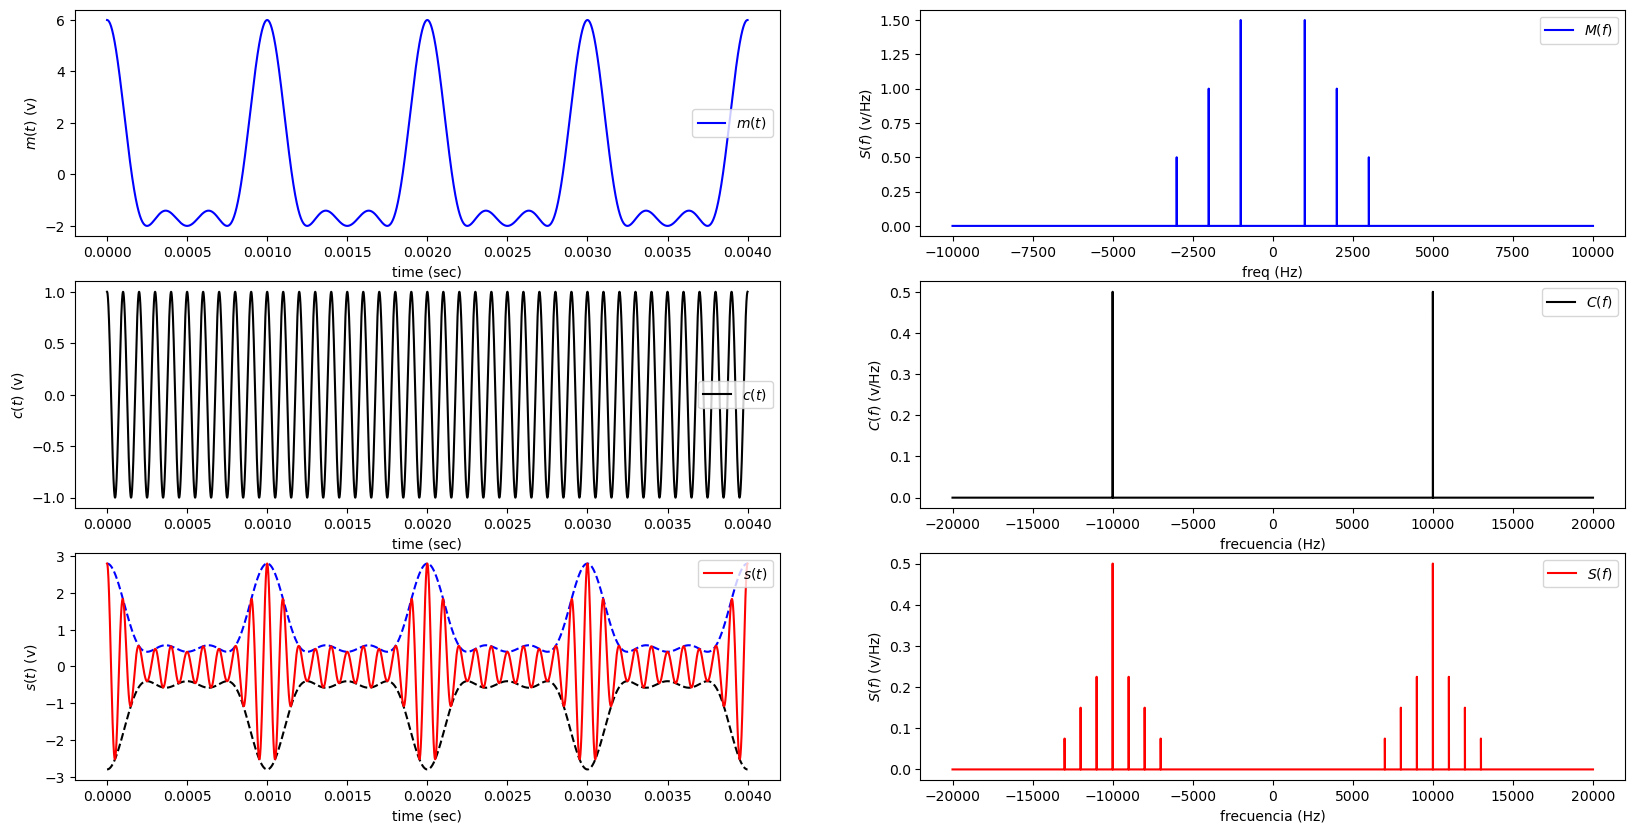

In [27]:
Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

modulacion_multiple(Am1,fm1,Am2,fm2,Am3,fm3,Ac,fc,Ka)

Es de esperar que si $mt=m1t+m2t+m3t$, al menos dos de las senales son linealmente dependientes entre ellas, a nivel del espectro se observaría dos pares de impulsos de igual magnitud ubicado a en (-fc,fc). En el caso anterior donde las tres senales moduladoras eran linealmente dependientes, el resultado es un par de impulsos. En el caso inicial que se tienen 3 señales moduladoras linealmente independientes, en el espectro se aprecia como cada señal genera un par de impulsos. 

Ahora, consideremos algunos valores arbitrarios para fm1,fm2,fm3, con tal de evitar un fenómeno de modulación. Dado que si $fm1 = fm2 = fm3$, se obtiene una onda moduladora senoidal. Se podría suponer que para valores cercanos entre sí de dichas frecuencias se obtenga la senal modulada requerida. Entonces considere $fm1 = 2000 Hz, fm2 = 2500 Hz, fm3 = 3000 Hz$

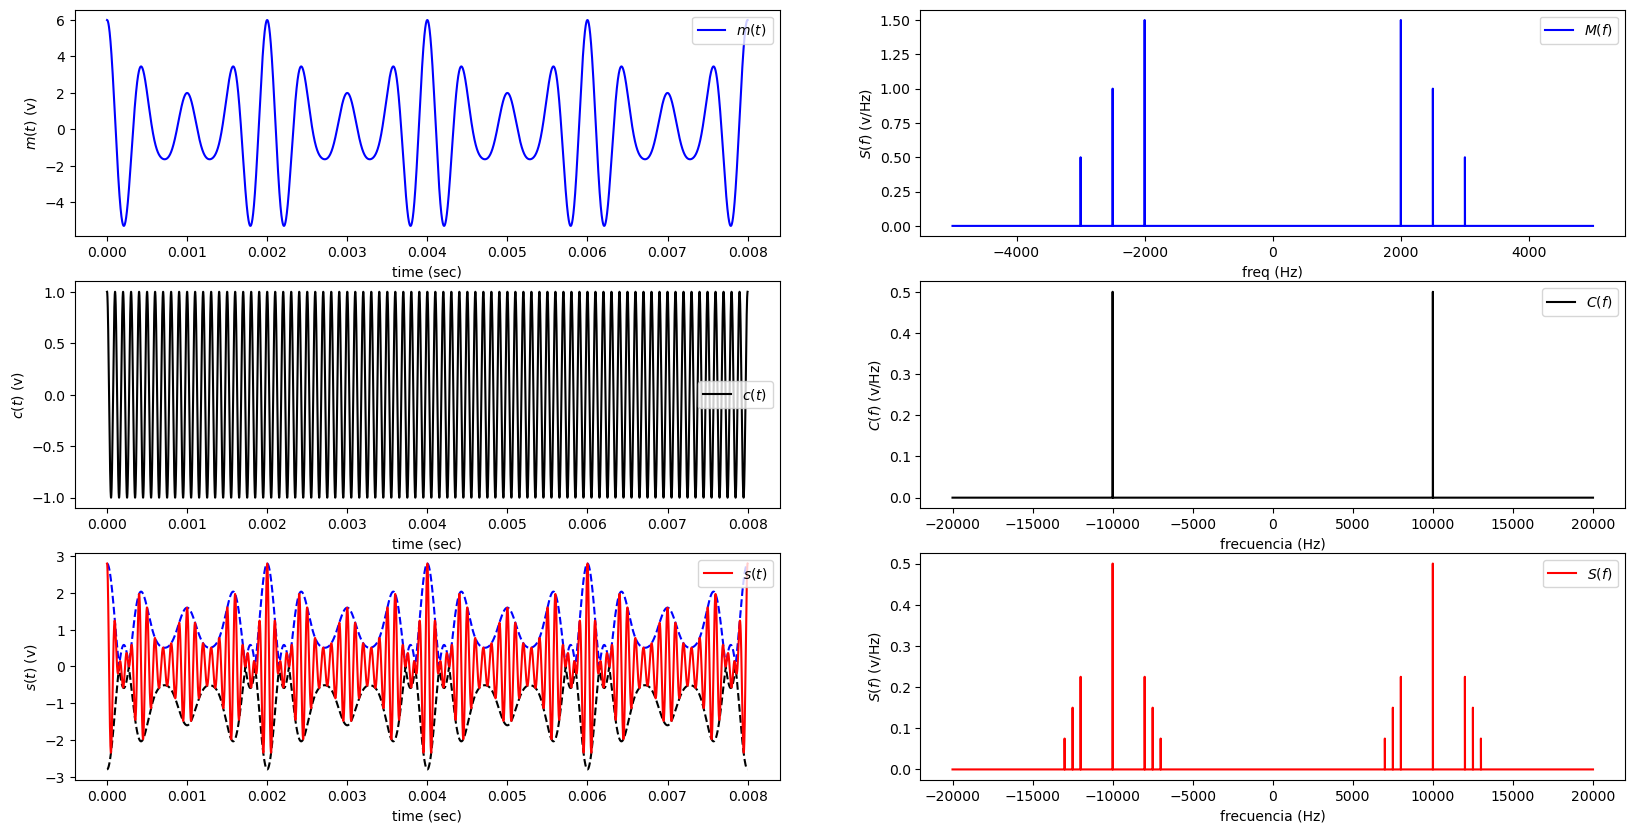

In [24]:
Am1=3 # Amplitud de la componente 1
fm1=2000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2500 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

modulacion_multiple(Am1,fm1,Am2,fm2,Am3,fm3,Ac,fc,Ka)

Con esos valores de frecuencia se obtuvo las figuras anteriores, aunque se logro evitar los fenómenos de submodulación y sobremodulación, en el gráfico de espectros se obtienen los impulsos de cada senal muy cercanos entre sí, que a nivel práctico podría representar un problema con la transmisión de información.

#### (b) fc

Dado que este la señal portadora es la misma para todas las señales moduladoras, la superposición de estas son las que van a modular a la portadora. Por lo que un cambio en la frecuencia fc, se reflejará en el punto donde se va a colocar los espectros de la $mt1, mt2,mt3$.Por lo que si la frecuencia fc es muy alta, se tendrán más componentes de frecuencias lo que hará que el gráfico de espectro parezca un región sombreada (observe las figuras siguientes)y no simplemente impulsos claramente separados. Para el caso de frecuencias muy bajas ocurre lo que se comentó en casos anteriores.

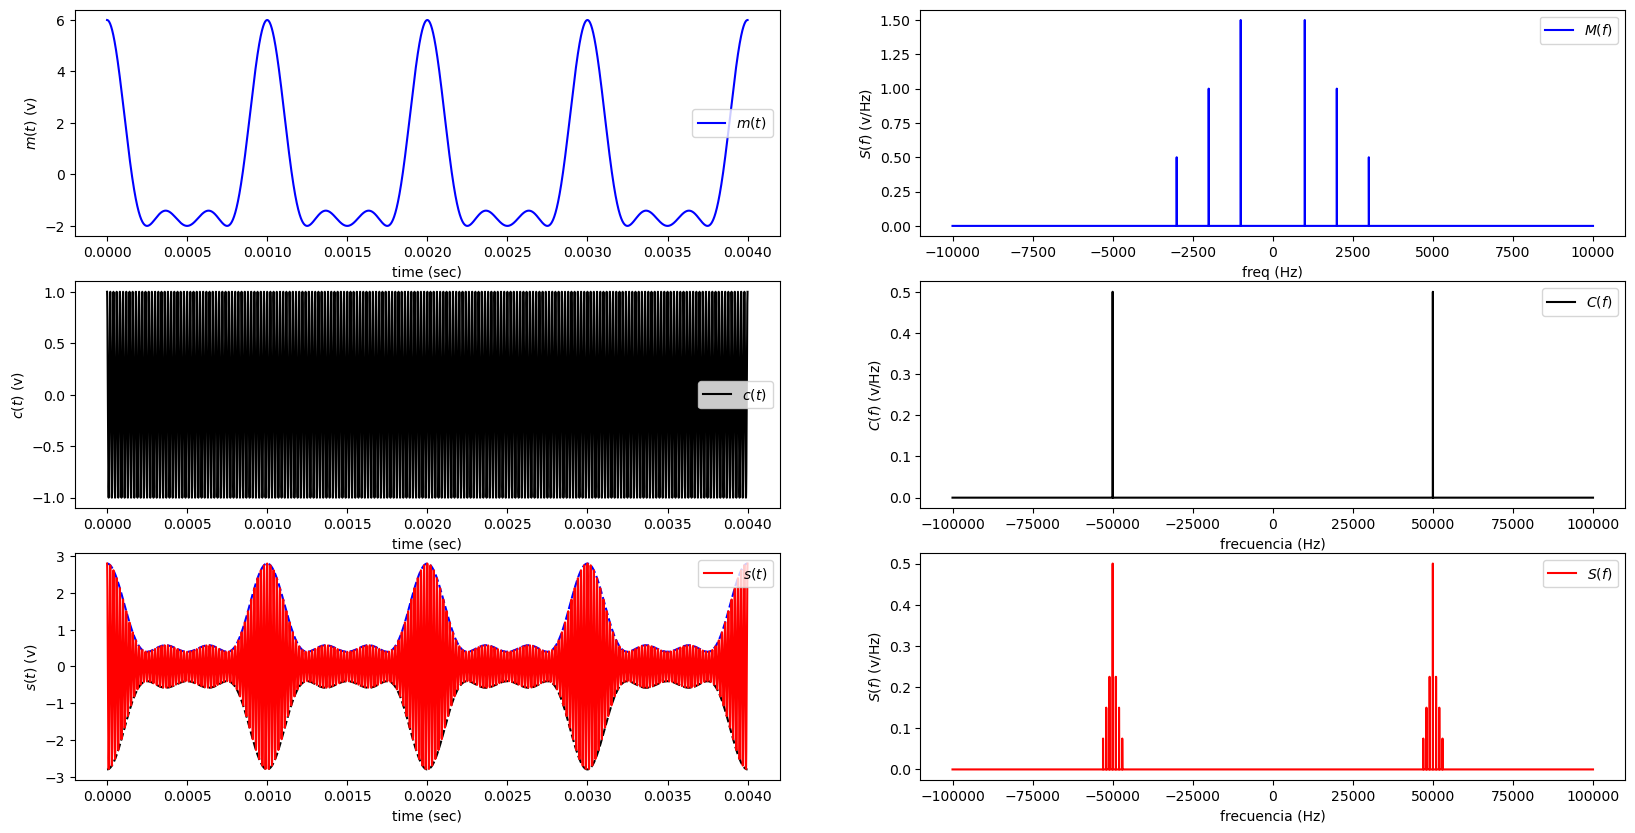

In [30]:
Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=50000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

modulacion_multiple(Am1,fm1,Am2,fm2,Am3,fm3,Ac,fc,Ka)

#### (c) La amplitud de cada componente de la señal mensaje Am1 Am2, y Am3

Para el caso de $Am1 = Am2 = Am3$, se tienen 3 señales senoidales de igual amplitud con diferente fase por lo que en la gráfica de espectros, se obtendran impulsos de igual magnitud para todas las señales, así que el único aspecto que las distingue es su ubicación en el dominio de la frecuencia, las siguientes figuras muestran este comportamiento. 

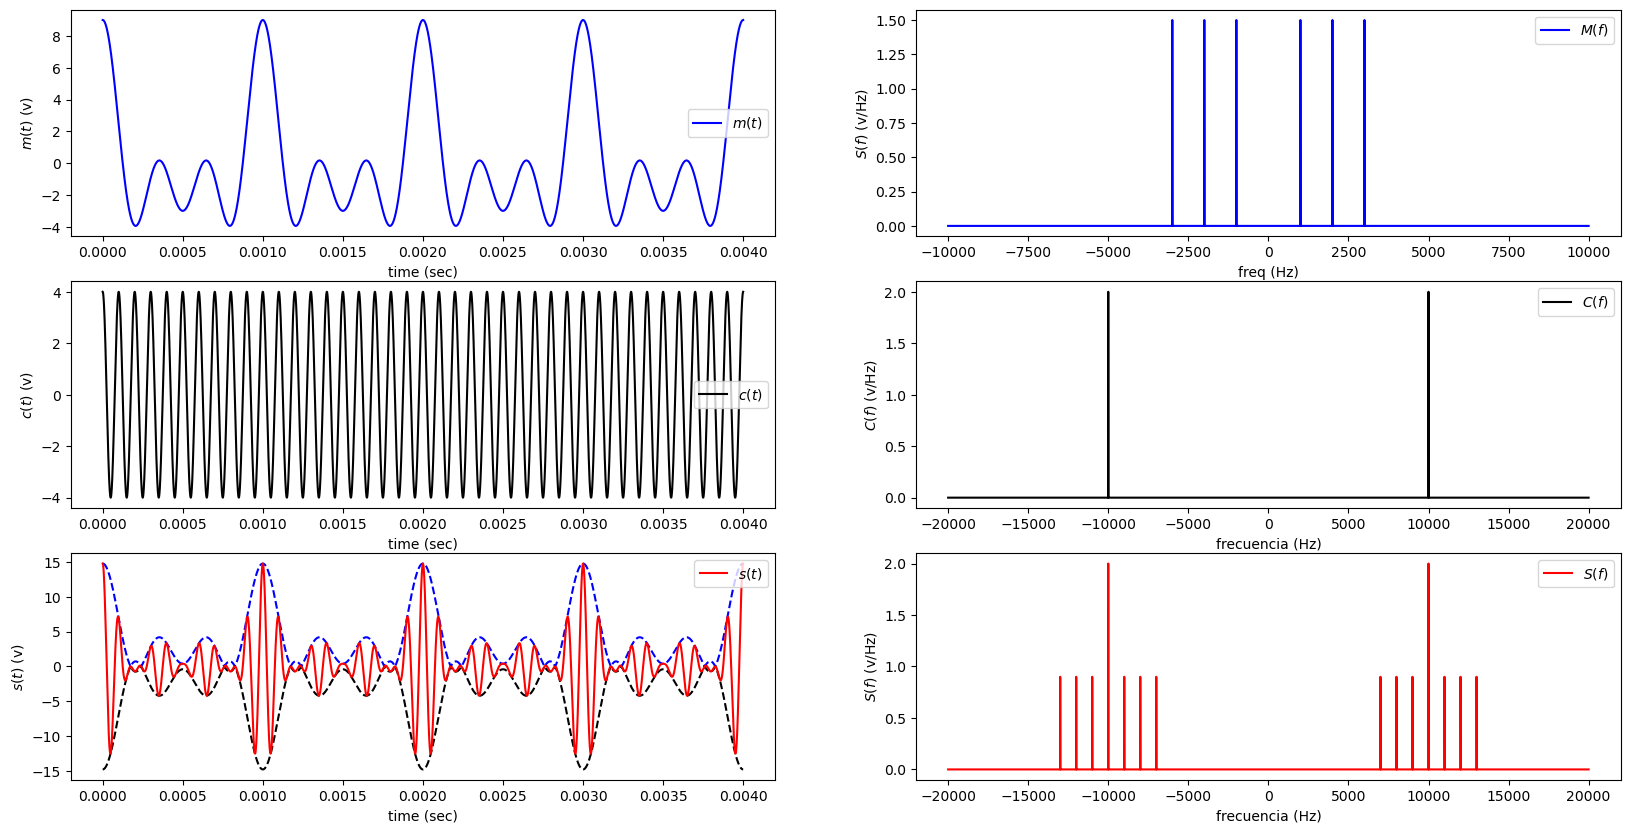

In [33]:
Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=3 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=3 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=2 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

modulacion_multiple(Am1,fm1,Am2,fm2,Am3,fm3,Ac,fc,Ka)

Por otro lado si los valores de $Am1, Am2, Am3$ son muy distintos entre sí, el mayor cambio se observaría en la señal modulada (dominio temporal) ya que aparece un serie de fenómenos de sobremodulación  submodulación (observe las siguientes figuras). Por lo tanto si se quiere transmitir señales por este medio sería adecuado que en términos de amplitud no difieran tanto entre sí.

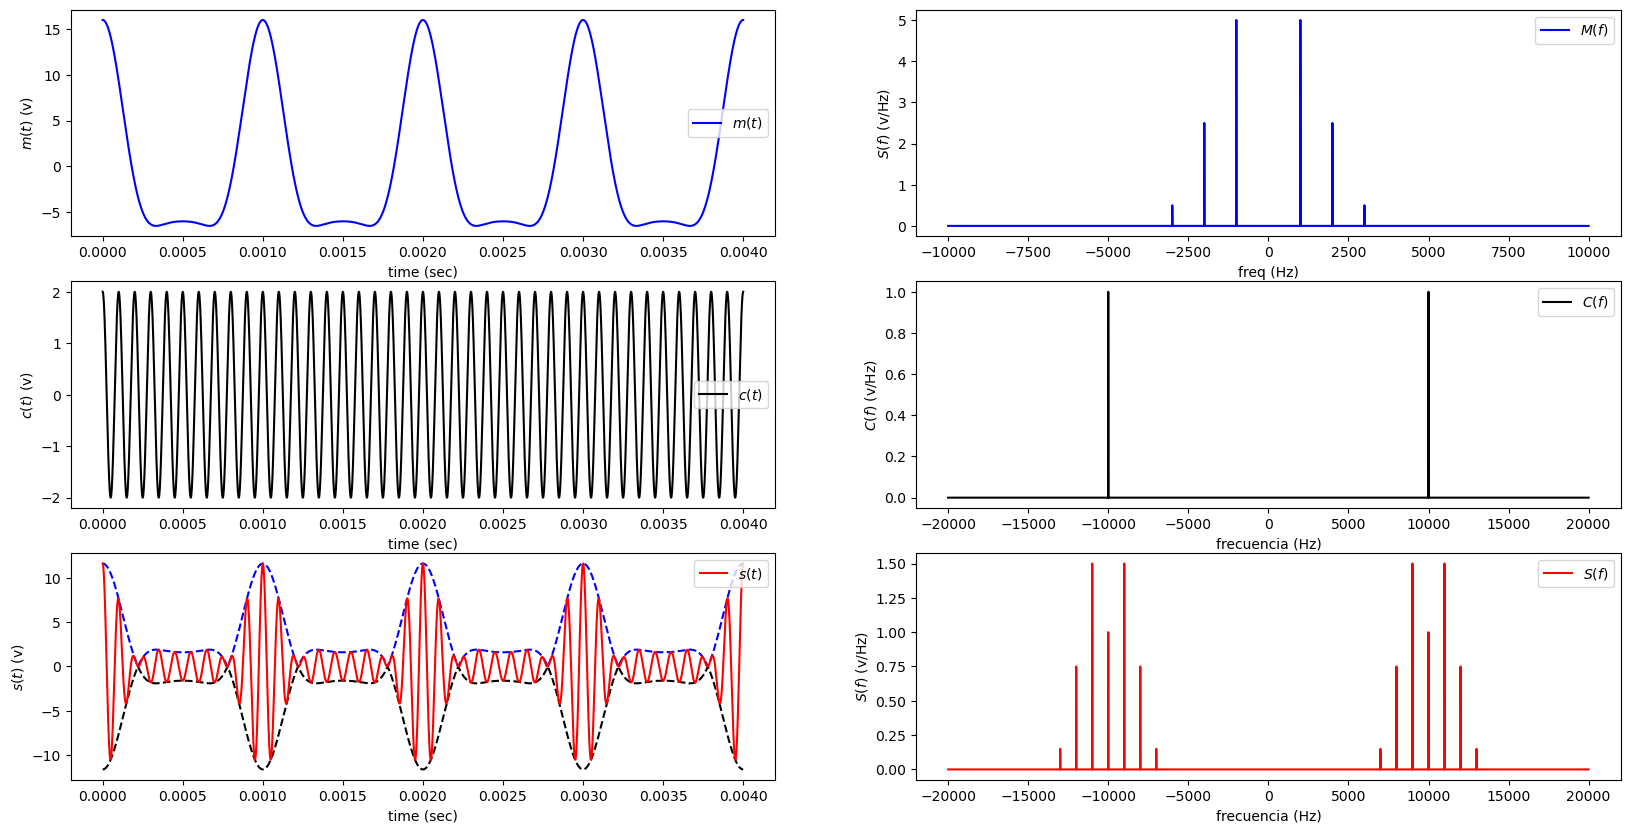

In [34]:
Am1=10# Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=5 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=2 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

modulacion_multiple(Am1,fm1,Am2,fm2,Am3,fm3,Ac,fc,Ka)

#### (d) Ac

En esencia cuando se modifica los valores de Ac, la forma geómitrica de las gráficas que dependen de este parámetro se mantiene constante, lo que cambia significativamente es la magnitud de la amplitud resultante, así como la magnitud de los pulsos en el espectro de frecuencias, lo cual quiere decir que afecta la potencia de la señal modulada.

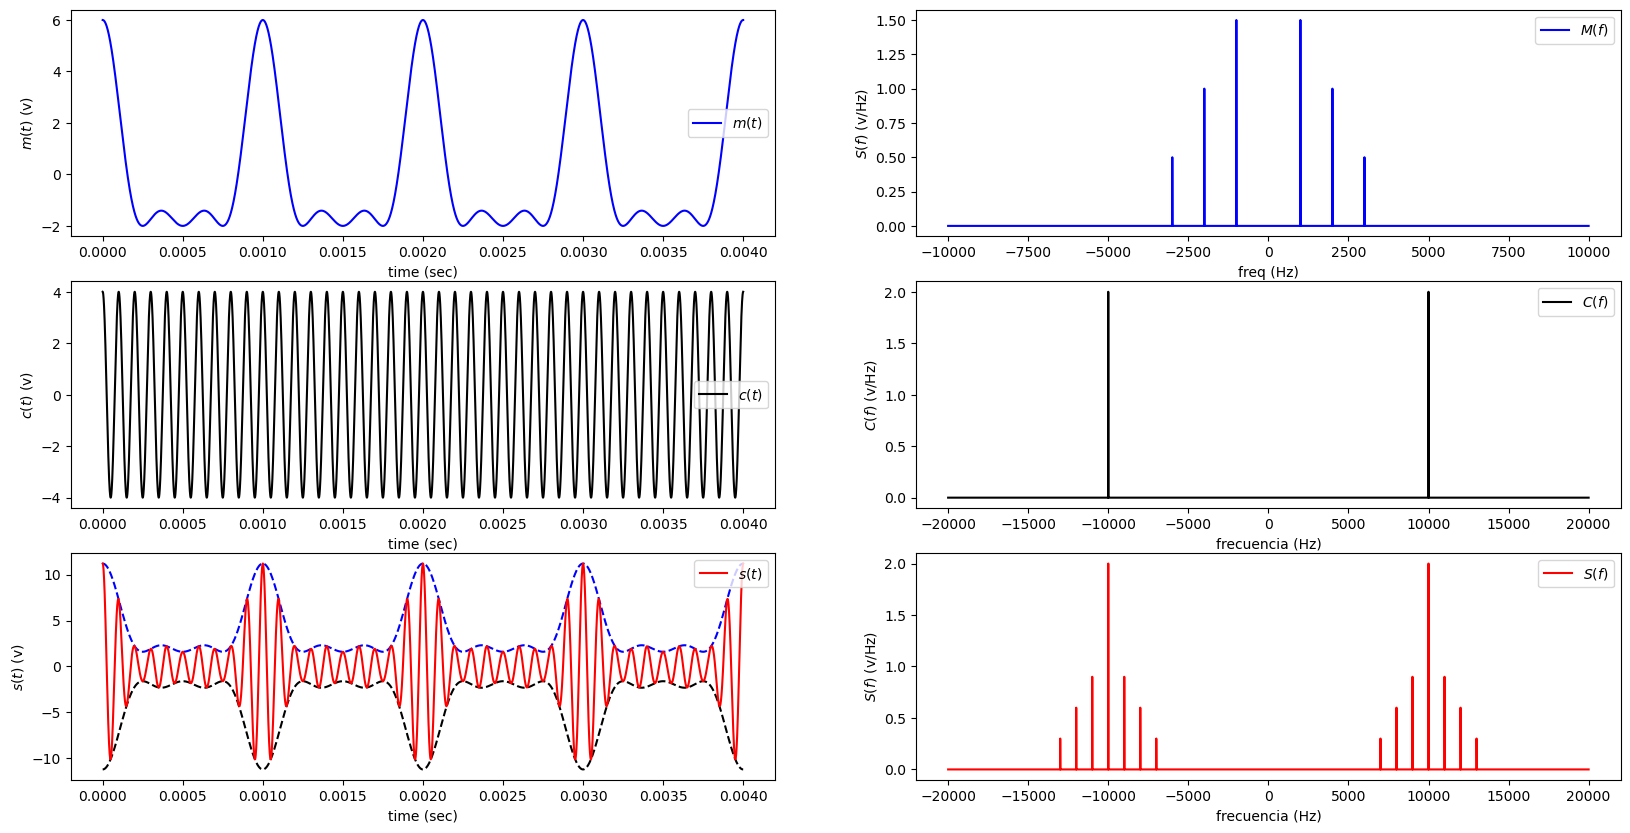

In [41]:
óAm1=3# Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=4 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

modulacion_multiple(Am1,fm1,Am2,fm2,Am3,fm3,Ac,fc,Ka)

## Bibliografía

1. M. Coto Jimenez and J. D. Rojas Fernandez, Se ̃nales y Sistemas para Ingenier ́ıa El ́ectrica.
Universidad de Costa Rica, 2023.

2. Micolau, F.R. & Ruiz, F.T. (s.f.). Comunicaciones analógicas: modulaciones AM y FM Una perspectiva histórica. Recuperado de: https://www.cartagena99.com/recursos/alumnos/apuntes/Modulo_2_Comunicaciones_Analogicas_modulaciones%20AM%20y%20FM.pdf